In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
# import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

# Bayesball: updating beliefs

The Bayes rule introduces the prior using just math! This is intuitively interpreted as the necessecity to think about any prior beliefs before making any assessment. And it's not something we do not all think in everyday life! Let's play a game!

<IPython.core.display.Javascript object>


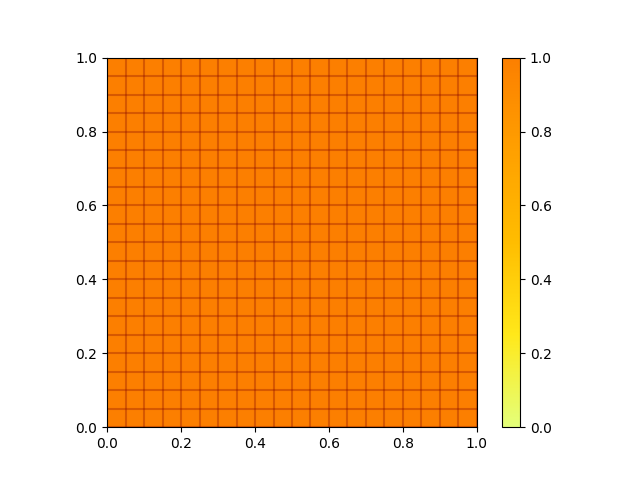

<IPython.core.display.Javascript object>


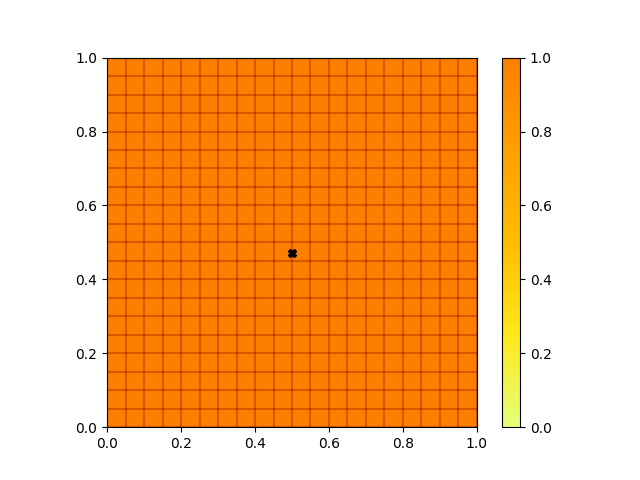

<IPython.core.display.Javascript object>


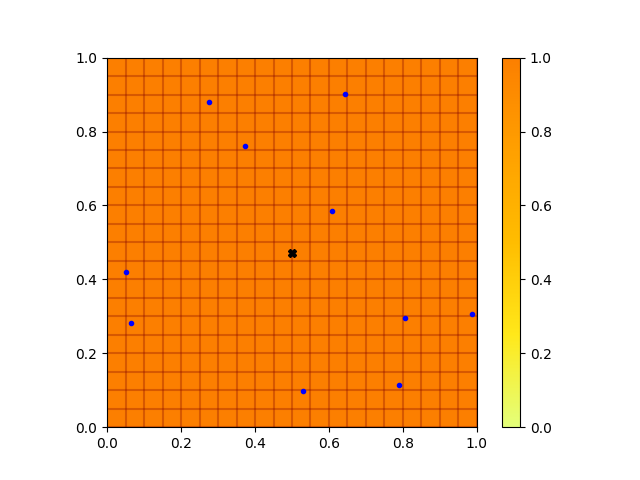

In [3]:
table_resolution = 20
example_prior = np.ones((table_resolution, table_resolution))

def show_table(probability, target=None, hits=None, title=None, showfig=True, fig=None):
    plt.figure()
    plt.title(title)
    plt.imshow(probability, cmap="Wistia", origin="lower", extent=(0, 1, 0, 1), vmin=0.0, vmax=1.0)
    for pos in np.linspace(0.0, 1.0, table_resolution+1):
        plt.axvline(pos, color="maroon", alpha=0.3)
        plt.axhline(pos, color="maroon", alpha=0.3)
    if target is not None:
        plt.plot(*target, marker="X", color="k")
    if hits is not None:
        hits_x, hits_y = zip(*hits)
        plt.plot(hits_x, hits_y, "b.")
    plt.colorbar()
    if showfig:
        plt.show()
    
def throw(size=1):
    return np.squeeze(np.random.rand(size, 2))


show_table(probability=example_prior)

example_target = throw()
show_table(probability=example_prior, target=example_target)

example_hits = throw(size=10)
show_table(probability=example_prior, target=example_target, hits=example_hits)

<IPython.core.display.Javascript object>


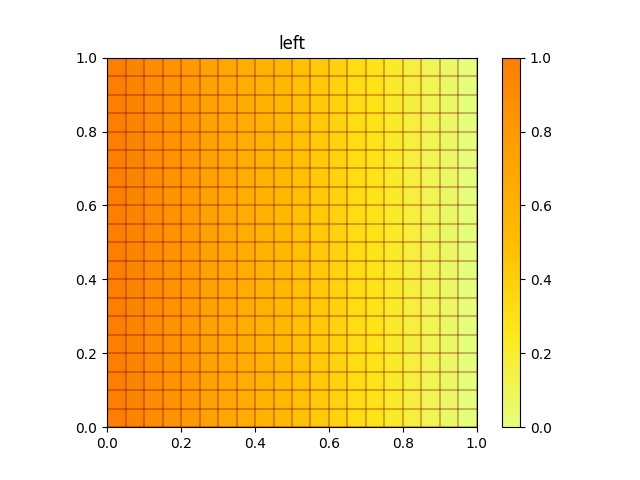

<IPython.core.display.Javascript object>


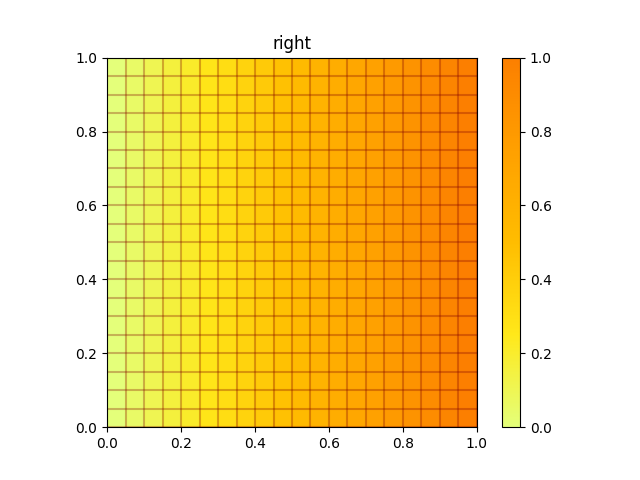

<IPython.core.display.Javascript object>


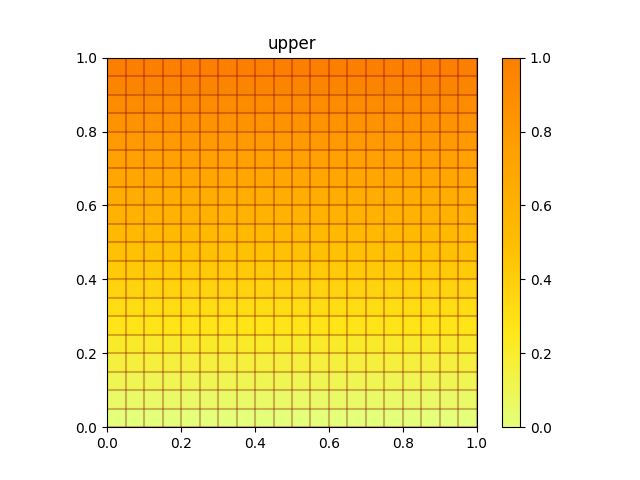

<IPython.core.display.Javascript object>


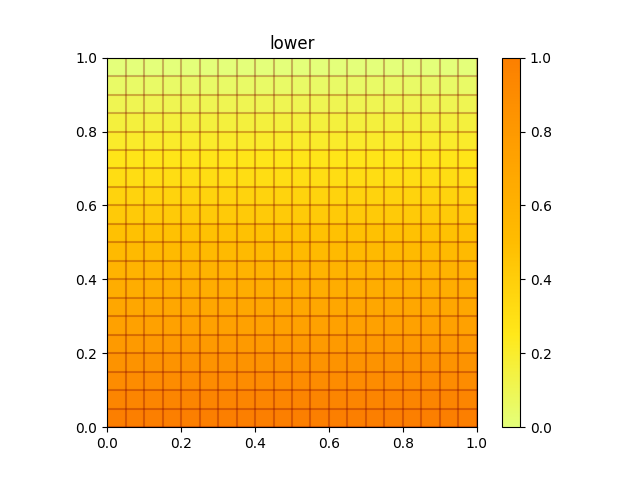

<IPython.core.display.Javascript object>


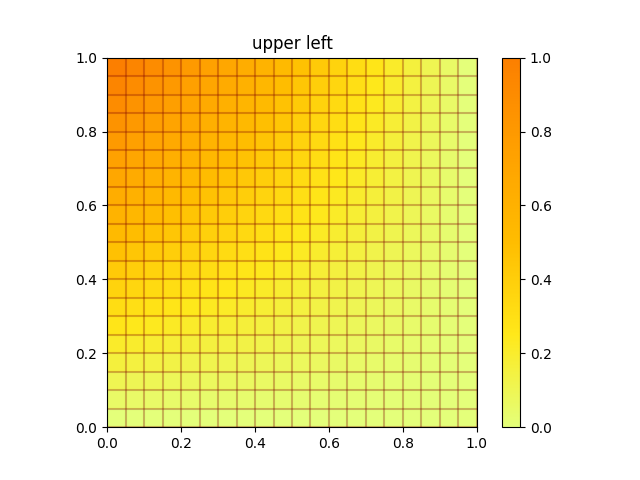

<IPython.core.display.Javascript object>


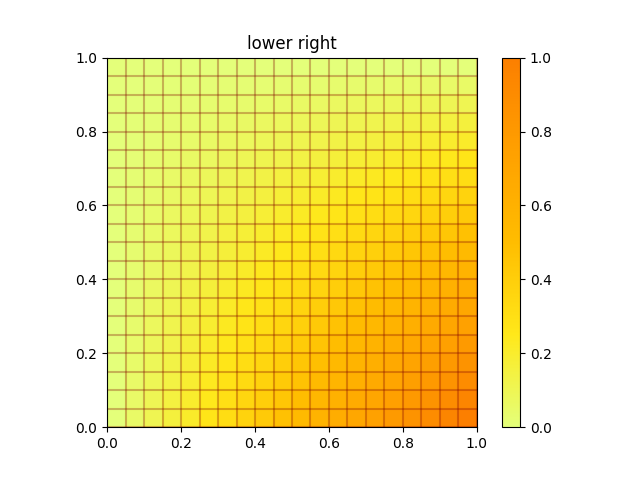

In [4]:
def seems_like(response):
    like = np.ones((table_resolution, table_resolution))
    if "left" in response:
        for col in range(table_resolution):
            like[:, col] *= 1.0 - col / (table_resolution - 1)
    if "right" in response:
        for col in range(table_resolution):
            like[:, col] *= col / (table_resolution - 1)
    if "upper" in response:
        for row in range(table_resolution):
            like[row, :] *= row / (table_resolution - 1)
    if "lower" in response:
        for row in range(table_resolution):
            like[row, :] *= 1.0 - row / (table_resolution - 1)
    return like
# show_table()

example_responses = ["left", "right", "upper", "lower", "upper left", "lower right"]
for where in example_responses:
    show_table(seems_like(where), title=where)

TARGET : (0.372, 0.693)
Final estimate: (0.353, 0.637)


<IPython.core.display.Javascript object>


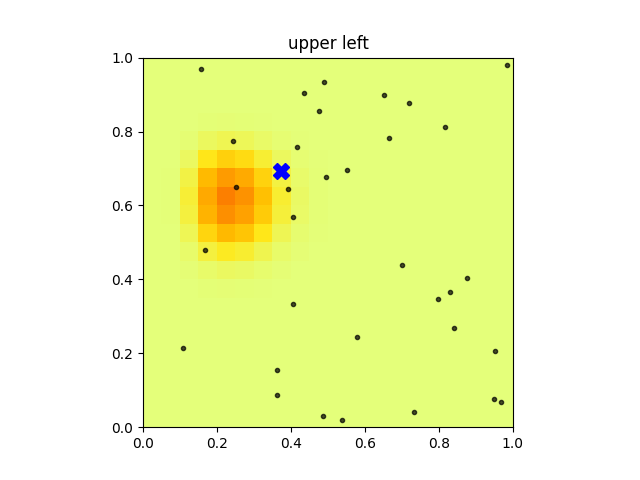

/home/konstantinos/miniconda3/envs/astrostat24/lib/python3.9/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [6]:
prior = np.ones((table_resolution, table_resolution))

def response(position, target):
    x_pos, y_pos = position
    x_tar, y_tar = target
    reply = "upper " if y_pos <= y_tar else "lower "
    reply += "right" if x_pos <= x_tar else "left"
    return reply

verbose = False
n_steps = 100

target = throw()
print("TARGET : ({:.3f}, {:.3f})".format(*target))

hits = []

likelihoods = [prior]
titles = ["Prior"]
for i in range(n_steps):
    hit = throw()
    hits.append(hit)
    reply = response(hit, target)
    likelihood = likelihoods[-1] * seems_like(reply)
    likelihood /= np.max(likelihood)
    likelihoods.append(likelihood)
    titles.append(reply)
#     if verbose:
#         print("Ball hit ({:.3f}, {:.3f})".format(*hit), end=" | ")
#         print(f"Response: {reply:11s}", end=" | ")

x_estimate = np.sum(likelihood * np.linspace(0, 1, table_resolution)) / np.sum(likelihood)
y_estimate = np.sum(likelihood.T * np.linspace(0, 1, table_resolution)) / np.sum(likelihood)
print(f"Final estimate: ({x_estimate:.3f}, {y_estimate:.3f})")

import matplotlib.animation as animation

fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

def animate(step):
    ax.clear()
    hits_x, hits_y = zip(*hits[:step+1])
    plt.imshow(likelihoods[step], cmap="Wistia", origin="lower", extent=(0, 1, 0, 1), vmin=0.0, vmax=1.0)
    plt.plot(hits_x, hits_y, "k.", alpha=0.7)
    plt.plot(*target, marker="X", markersize=12, color="b")
    plt.title(titles[step])
    

ani = animation.FuncAnimation(fig, func=animate, frames=n_steps, interval=20, repeat=True, blit=False)
plt.show()
# display(ani)